### code of fixing the mutation on the basis of heterozygosity

In [ ]:
import pandas as pd

# Read data from Sheet1 and Sheet2
df1 = pd.read_excel('/home/bernadettem/bernadettenotebook/Yeast_genome/yeast final figure/yeast_fixed_mutation_data.xlsx', sheet_name='Sheet1')
df2 = pd.read_excel('/home/bernadettem/bernadettenotebook/Yeast_genome/yeast final figure/yeast_fixed_mutation_data.xlsx', sheet_name='Sheet2')

# Merge the dataframes on common columns
merged_df = pd.merge(df2, df1[['CHROM', 'POS', 'REF', 'ALT', 'population_name', 'group_mutation_type', 'accumulate_gain']], 
                     on=['CHROM', 'POS', 'REF', 'ALT', 'population_name', 'group_mutation_type'], 
                     how='left')

# Display or save the result
print(merged_df)

# Save to a new Excel file if needed
merged_df.to_excel('/home/bernadettem/bernadettenotebook/Yeast_genome/yeast final figure/output_file.xlsx', index=False)


In [2]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax

Text(0.5, 1.0, 'Box Plot of accumulate_gain vs Mutation Type')

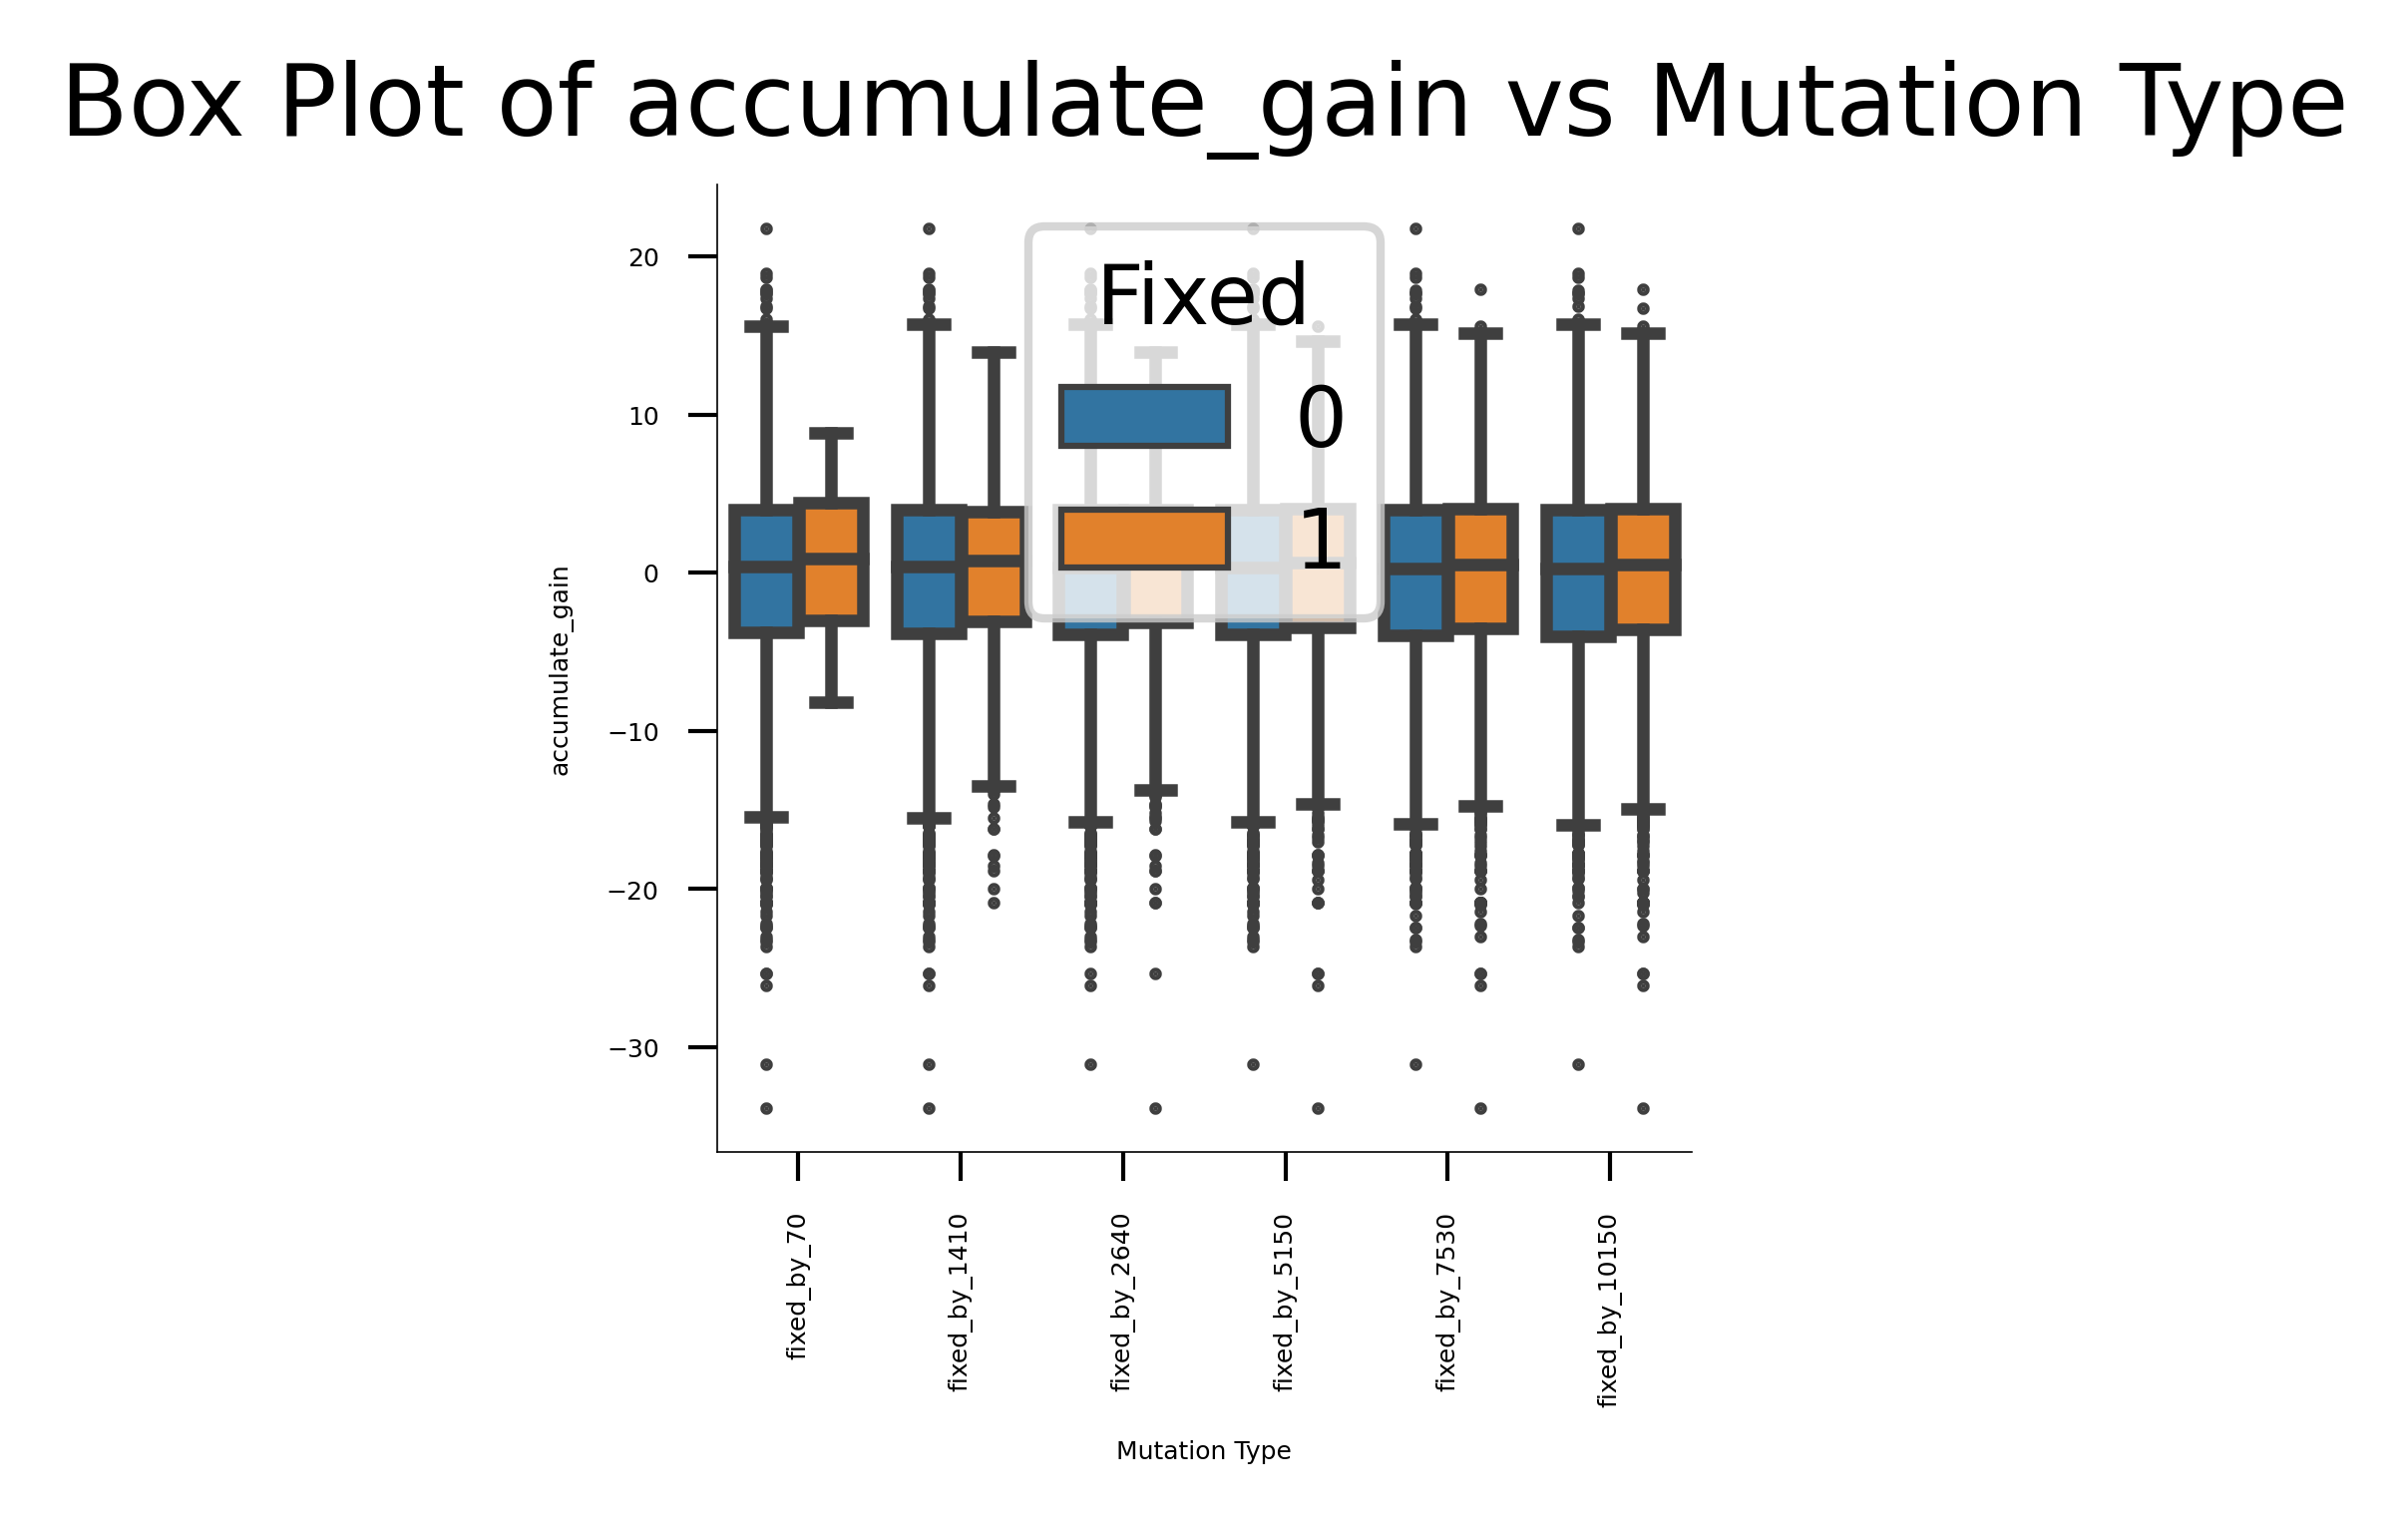

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read your Excel sheet into a DataFrame
df = pd.read_excel('/home/bernadettem/bernadettenotebook/Yeast_genome/yeast final figure/output_file.xlsx')

# Columns for box plot
columns_for_box_plot = ['fixed_by_70', 'fixed_by_1410', 'fixed_by_2640', 'fixed_by_5150', 'fixed_by_7530', 'fixed_by_10150']

# Convert True to 1 and False to 0
df[columns_for_box_plot] = df[columns_for_box_plot].astype(int)

# Melt the DataFrame for box plot
df_melted = pd.melt(df, id_vars=['accumulate_gain'], value_vars=columns_for_box_plot,
                    var_name='Mutation Type', value_name='Fixed')

# Create a box plot for both True and False values side by side
fig, ax = plt.subplots(1,  1, dpi = 600, figsize = (2.1,2.1), sharex=True)
ax = custom_figure_axis(ax=ax,fontsize=2,show_ticks=True,rotation=0)
ax = custom_figure_axis(ax=ax,fontsize=3,show_ticks=True)
sns.boxplot(x='Mutation Type', y='accumulate_gain', hue='Fixed', data=df_melted,flierprops=dict(marker='o', markersize=0.5))
plt.title('Box Plot of accumulate_gain vs Mutation Type')
#plt.savefig("/home/bernadettem/bernadettenotebook/Yeast_genome/yeast final figure/Accumulate_gain vs Fixed Mutation based on heterozygosity2.pdf", dpi = 600)
#plt.show()
